# Timeline Analysis : Covid-19(TASK 8)
# Sameer Dhole
# #GRIPFEB21

In [46]:
covid_data = pd.read_csv(r"C:\Users\dhole\Downloads\owid-covid-data.csv");
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67360,ZWE,Africa,Zimbabwe,2021-02-03,33964.0,150.0,237.143,1269.0,15.0,21.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
67361,ZWE,Africa,Zimbabwe,2021-02-04,34171.0,207.0,217.857,1288.0,19.0,18.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
67362,ZWE,Africa,Zimbabwe,2021-02-05,34331.0,160.0,197.000,1303.0,15.0,17.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
67363,ZWE,Africa,Zimbabwe,2021-02-06,34487.0,156.0,173.429,1316.0,13.0,17.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [4]:
covid_data.shape

(67365, 59)

In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67365 entries, 0 to 67364
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               64375 non-null  object 
 1   continent                              63992 non-null  object 
 2   location                               67365 non-null  object 
 3   date                                   67365 non-null  object 
 4   total_cases                            66754 non-null  float64
 5   new_cases                              66752 non-null  float64
 6   new_cases_smoothed                     65751 non-null  float64
 7   total_deaths                           57906 non-null  float64
 8   new_deaths                             58064 non-null  float64
 9   new_deaths_smoothed                    65751 non-null  float64
 10  total_cases_per_million                63769 non-null  float64
 11  ne

In [6]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.675400e+04,66752.000000,65751.000000,5.790600e+04,58064.000000,65751.000000,63769.000000,63762.00000,62808.000000,55088.000000,...,61633.000000,42185.000000,62278.000000,62993.000000,49108.000000,48435.000000,31222.000000,57157.000000,64044.000000,61912.000000
mean,5.339549e+05,5040.053586,5051.582579,1.669356e+04,128.224098,111.466137,6161.884730,61.98323,61.950351,149.035929,...,19121.367630,13.208641,256.744071,7.776083,10.570521,32.649733,51.076977,3.040613,73.120001,0.715278
std,3.787040e+06,32237.711840,31966.353245,9.611481e+04,707.505579,639.881478,12465.234633,167.17988,139.522986,274.159474,...,19642.680202,19.894189,118.200799,3.909659,10.416006,13.459322,31.769744,2.470282,7.545198,0.153703
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.43700,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,6.160000e+02,1.000000,5.286000,3.300000e+01,0.000000,0.000000,116.010000,0.08400,0.882000,5.030000,...,4541.795000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.590000
50%,6.567500e+03,53.000000,64.286000,2.100000e+02,1.000000,0.857000,903.133000,5.20800,7.170000,26.152500,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.747000
75%,7.222700e+04,621.000000,643.857000,1.994000e+03,15.000000,11.286000,5530.295000,48.36175,54.258500,144.465250,...,27216.445000,21.200000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.570000,0.843000
max,1.061625e+08,858062.000000,738534.000000,2.317201e+06,17882.000000,14402.429000,132673.267000,8652.65800,2648.773000,2033.119000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [8]:
covid_data.nunique()

iso_code                                   192
continent                                    6
location                                   200
date                                       405
total_cases                              34429
new_cases                                 9418
new_cases_smoothed                       17827
total_deaths                             12981
new_deaths                                2312
new_deaths_smoothed                       5155
total_cases_per_million                  48565
new_cases_per_million                    27655
new_cases_smoothed_per_million           31330
total_deaths_per_million                 28485
new_deaths_per_million                    5560
new_deaths_smoothed_per_million           6797
reproduction_rate                          356
icu_patients                              1938
icu_patients_per_million                  3956
hosp_patients                             3696
hosp_patients_per_million                 6291
weekly_icu_ad

In [9]:
covid_data.isnull().sum()

iso_code                                  2990
continent                                 3373
location                                     0
date                                         0
total_cases                                611
new_cases                                  613
new_cases_smoothed                        1614
total_deaths                              9459
new_deaths                                9301
new_deaths_smoothed                       1614
total_cases_per_million                   3596
new_cases_per_million                     3603
new_cases_smoothed_per_million            4557
total_deaths_per_million                 12277
new_deaths_per_million                   12278
new_deaths_smoothed_per_million           4557
reproduction_rate                        16070
icu_patients                             60198
icu_patients_per_million                 60198
hosp_patients                            58846
hosp_patients_per_million                58846
weekly_icu_ad

In [10]:
df= covid_data 
df=df.replace(np.nan, 0)

In [11]:
df.isnull().sum()

iso_code                                 0
continent                                0
location                                 0
date                                     0
total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
icu_patients                             0
icu_patients_per_million                 0
hosp_patients                            0
hosp_patients_per_million                0
weekly_icu_admissions                    0
weekly_icu_admissions_per_million        0
weekly_hosp

In [12]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.continent.value_counts()[0:10]

Africa           17763
Europe           16255
Asia             16222
North America     7790
South America     4124
Oceania           1838
Name: continent, dtype: int64

In [13]:
# Analyzing cases worldwide 
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
626,NaN,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
1324,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1667,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1992,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2324,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.780
2728,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825
3072,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.755
3455,NaN,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# looking at different locations
covid_data["location"].value_counts()

Argentina               404
Mexico                  404
Thailand                401
Taiwan                  389
South Korea             385
                       ... 
Marshall Islands        103
Vanuatu                  90
Samoa                    82
Hong Kong                74
Micronesia (country)     18
Name: location, Length: 200, dtype: int64

In [28]:
# covid cases in india

india=df[df["location"]=="India"]
india.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
27974,IND,Asia,India,2021-02-04,10802591.0,12408.0,11791.857,154823.0,120.0,116.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
27975,IND,Asia,India,2021-02-05,10814304.0,11713.0,11596.286,154918.0,95.0,110.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
27976,IND,Asia,India,2021-02-06,10826363.0,12059.0,11455.571,154996.0,78.0,103.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
27977,IND,Asia,India,2021-02-07,10838194.0,11831.0,11512.000,155080.0,84.0,98.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
27978,IND,Asia,India,2021-02-08,0.0,0.0,0.000,0.0,0.0,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [25]:
india_last_5_days=india.tail()

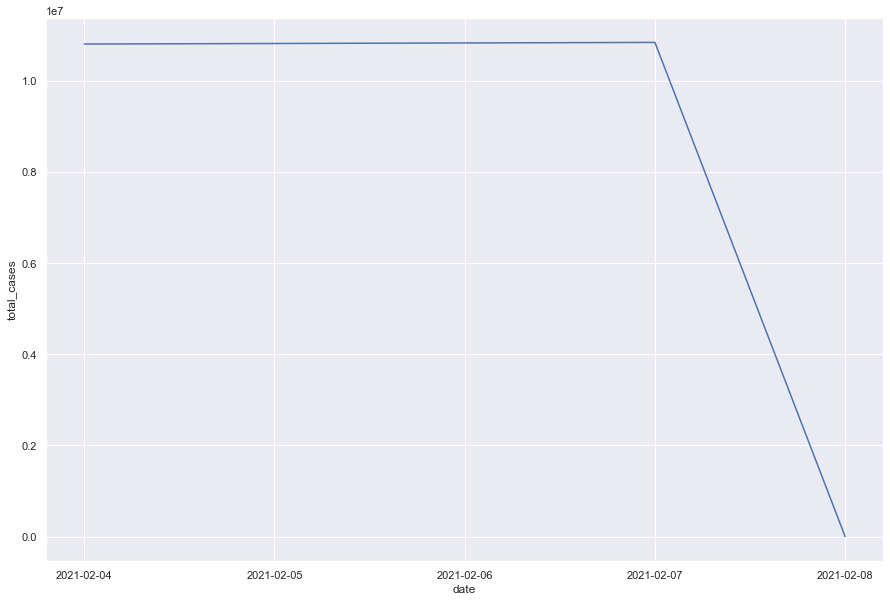

In [26]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

In [27]:
brazil=df[df["location"]=="Brazil"]
brazil.head()
brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9000,BRA,South America,Brazil,2021-02-03,9339420.0,56002.0,48934.857,227563.0,1254.0,1057.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759
9001,BRA,South America,Brazil,2021-02-04,9396293.0,56873.0,48229.429,228795.0,1232.0,1035.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759
9002,BRA,South America,Brazil,2021-02-05,9447165.0,50872.0,46950.286,230034.0,1239.0,1052.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759
9003,BRA,South America,Brazil,2021-02-06,9447165.0,0.0,38598.571,230034.0,0.0,869.857,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759
9004,BRA,South America,Brazil,2021-02-07,9524640.0,77475.0,45701.286,231534.0,1500.0,1004.286,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.759


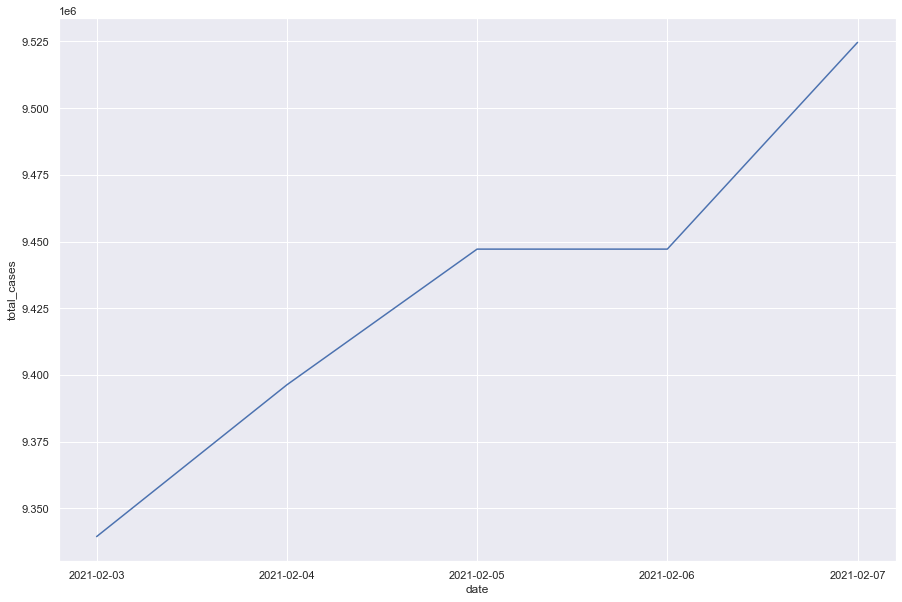

In [23]:
brazil_last_5_days=brazil.tail()
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [29]:
# understanding cases of india,china and japan

india_japan_china=df[(df["location"]=="India") | (df["location"]=="China") | (df["location"]=="Japan")]

In [30]:
# getting latset data

last_day_cases=df[(df["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498
659,0,0,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
1008,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785
1357,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754
1700,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65974,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694
66357,OWID_WRL,0,World,2020-12-18,75760359.0,719253.0,645068.429,1675522.0,12619.0,11438.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000
66661,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
66988,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588


In [31]:

# sorting date w.r.t to total cases

max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
66357,OWID_WRL,0,World,2020-12-18,75760359.0,719253.0,645068.429,1675522.0,12619.0,11438.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000
20882,0,0,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
44528,0,0,North America,2020-12-18,20222106.0,276330.0,243096.857,463383.0,3763.0,3395.143,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
3488,0,0,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
64170,USA,North America,United States,2020-12-18,17545869.0,251033.0,220290.286,313898.0,2797.0,2576.714,...,54225.446,1.2,151.089,10.79,19.100,24.600,0.000,2.770,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65261,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,0.0,0.0,0.000,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,75.12,0.000
55062,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,0.0,0.0,0.000,...,2205.923,25.1,459.780,18.68,0.000,0.000,35.890,1.400,73.00,0.546
38306,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,0.0,0.0,0.000,...,3819.202,0.0,557.793,30.53,0.000,0.000,82.502,2.700,73.70,0.708
51512,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,0.0,0.0,0.000,...,6021.557,0.0,348.977,9.21,16.700,38.100,0.000,0.000,73.32,0.713


In [32]:
# top 5 countries with maximum case
max_cases_country[1:6]


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
20882,0,0,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
44528,0,0,North America,2020-12-18,20222106.0,276330.0,243096.857,463383.0,3763.0,3395.143,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
3488,0,0,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000
64170,USA,North America,United States,2020-12-18,17545869.0,251033.0,220290.286,313898.0,2797.0,2576.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
21264,0,0,European Union,2020-12-18,13969915.0,157984.0,133727.286,331199.0,4093.0,3516.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,0.000


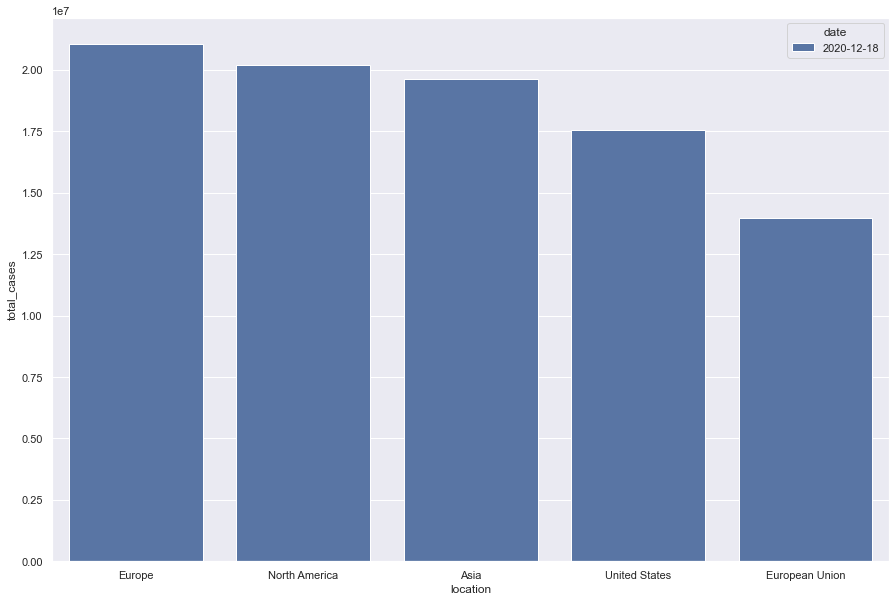

In [33]:
# plot on bar plot

sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()

In [53]:
df1=pd.qcut(df['life_expectancy'], q=20)

In [54]:
df1

0        (64.26, 66.47]
1        (64.26, 66.47]
2        (64.26, 66.47]
3        (64.26, 66.47]
4        (64.26, 66.47]
              ...      
67360     (59.29, 61.6]
67361     (59.29, 61.6]
67362     (59.29, 61.6]
67363     (59.29, 61.6]
67364     (59.29, 61.6]
Name: life_expectancy, Length: 67365, dtype: category
Categories (20, interval[float64]): [(-0.001, 53.28] < (53.28, 59.29] < (59.29, 61.6] < (61.6, 64.26] ... (79.19, 81.33] < (81.33, 82.3] < (82.3, 83.44] < (83.44, 86.75]]

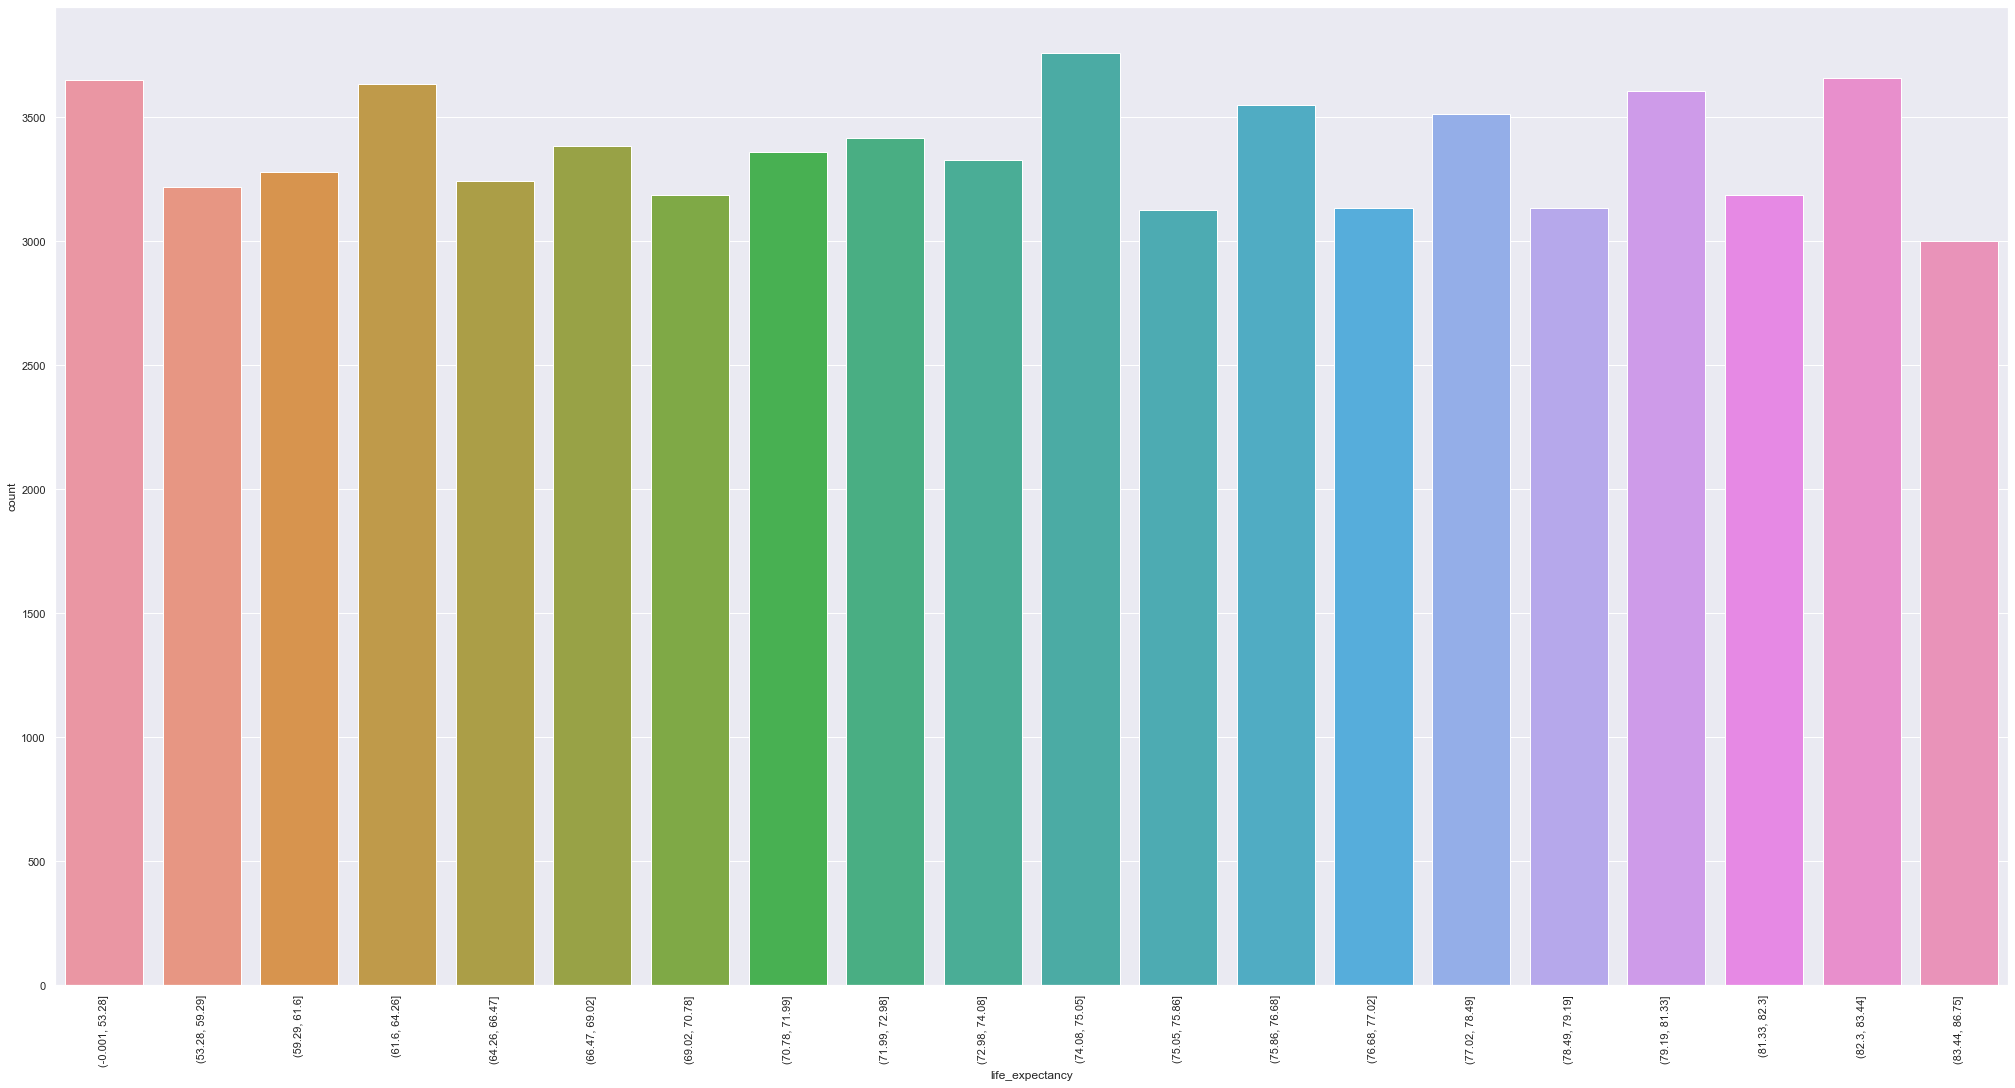

In [55]:
plt.figure(figsize=(35,18))
sns.countplot(x=df1)
plt.xticks(rotation=90)
plt.show()

In [63]:
df3=pd.qcut(df['female_smokers'], q=20,duplicates='drop')

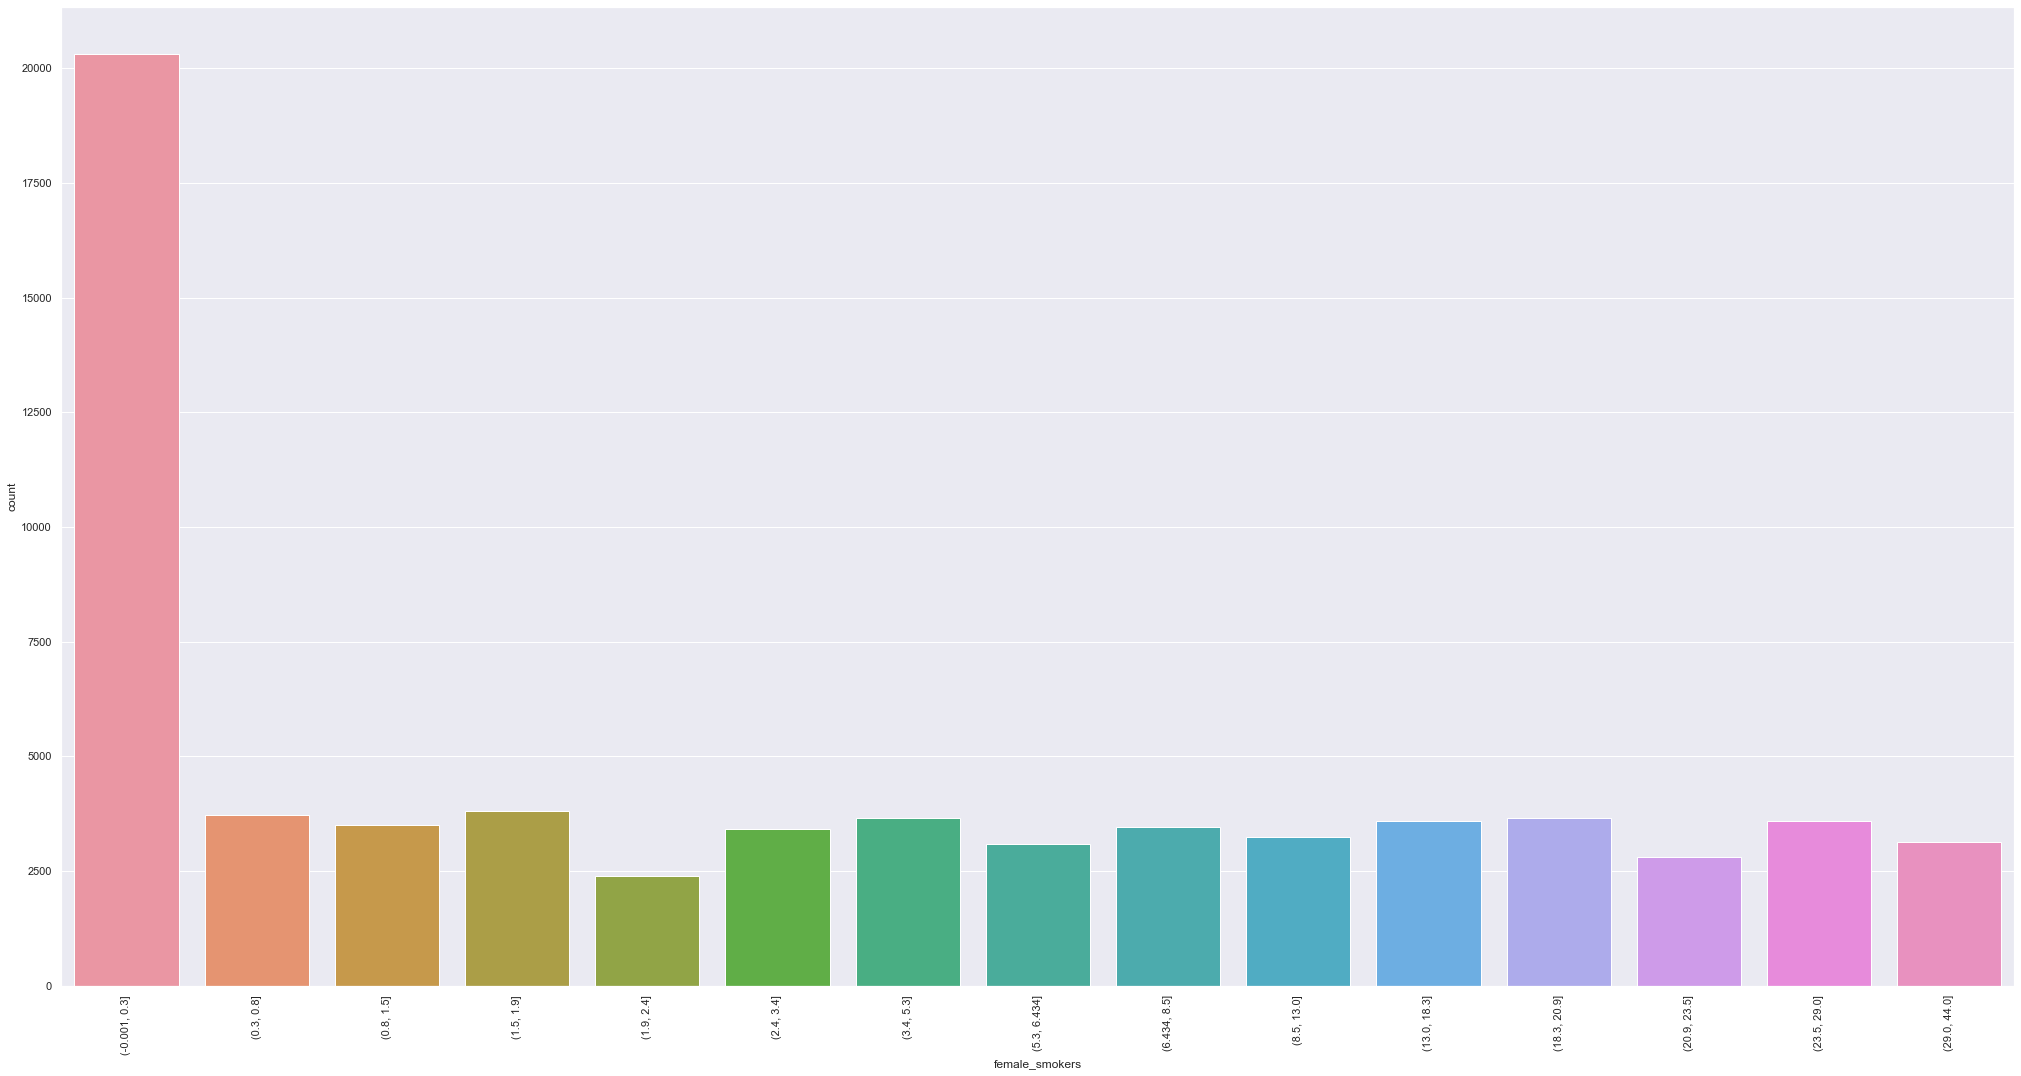

In [64]:
plt.figure(figsize=(35,18))
sns.countplot(x=df3)
plt.xticks(rotation=90)
plt.show()

In [69]:
df4=pd.qcut(df['new_cases'], q=10,duplicates='drop')

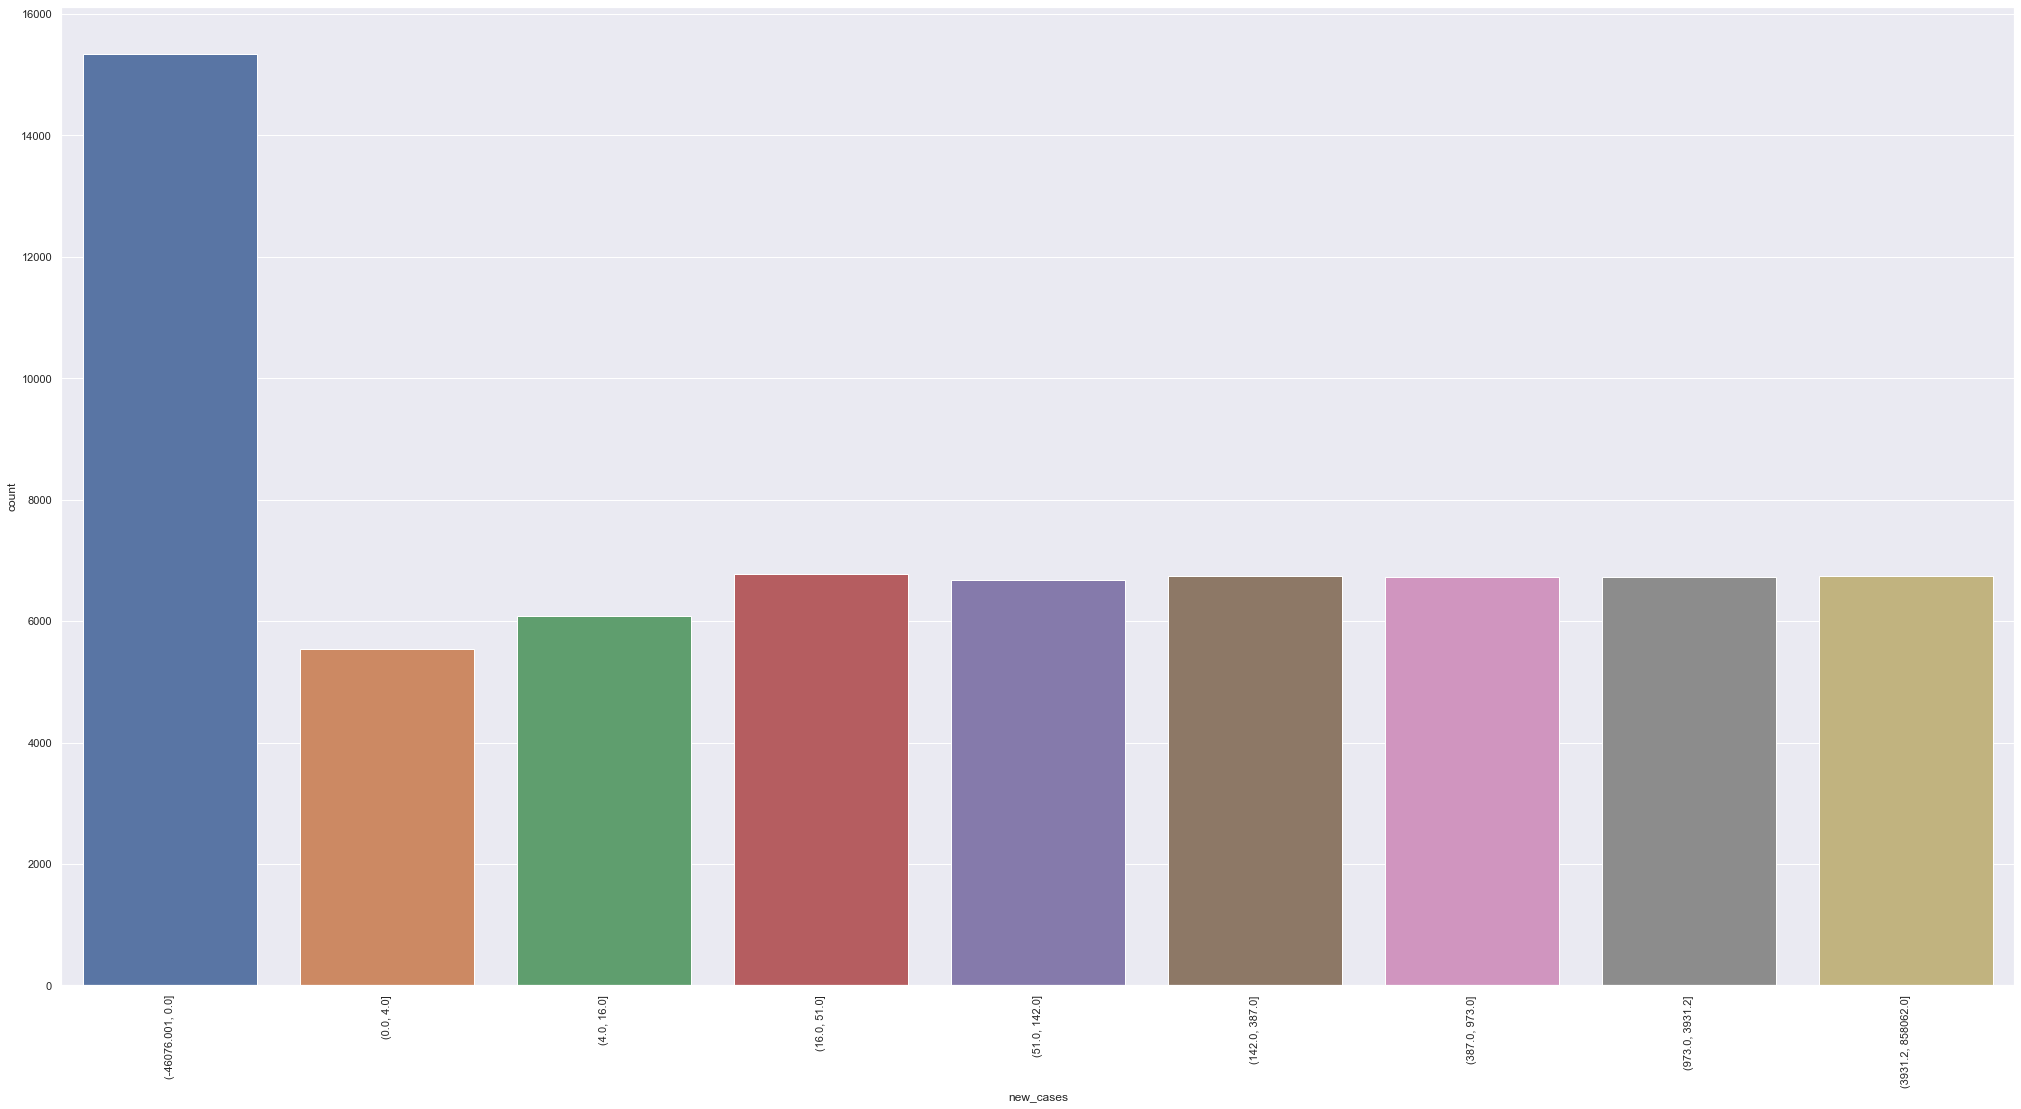

In [70]:
plt.figure(figsize=(35,18))
sns.countplot(x=df4)
plt.xticks(rotation=90)
plt.show()

In [73]:
# covid cases in usa

us=df[df["location"]=="United States"]
us.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
64217,USA,North America,United States,2021-02-03,26557026.0,121469.0,136995.000,450797.0,3912.0,3086.000,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
64218,USA,North America,United States,2021-02-04,26680214.0,123188.0,130504.714,455881.0,5084.0,3240.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
64219,USA,North America,United States,2021-02-05,26813772.0,133558.0,125854.000,459555.0,3674.0,3250.857,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
64220,USA,North America,United States,2021-02-06,26917787.0,104015.0,120414.571,462169.0,2614.0,3234.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
64221,USA,North America,United States,2021-02-07,27007368.0,89581.0,117226.714,463476.0,1307.0,3164.571,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924


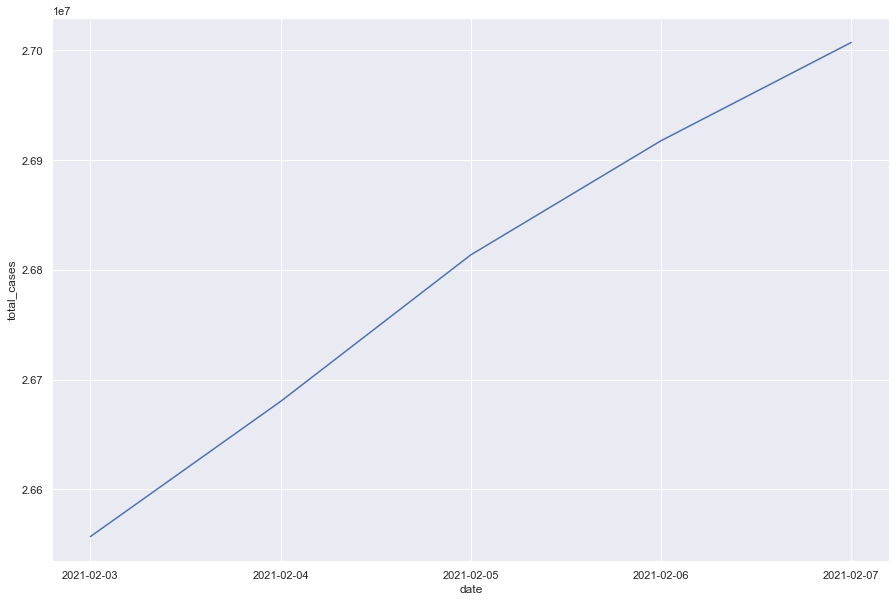

In [74]:
us_last_5_days=us.tail()
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=us_last_5_days)
plt.show()